In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open('train.p',mode='rb') as training_data:
    train = pickle.load(training_data)
with open('valid.p',mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('test.p',mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train,y_train = train['features'],train['labels']
x_valid,y_valid = valid['features'],valid['labels']
x_test,y_test = test['features'],test['labels']

13

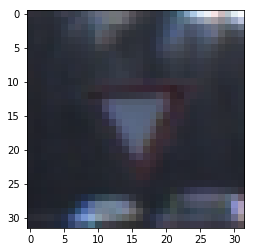

In [4]:
i = np.random.randint(1,len(x_train))
plt.imshow(x_train[i])
y_train[i]

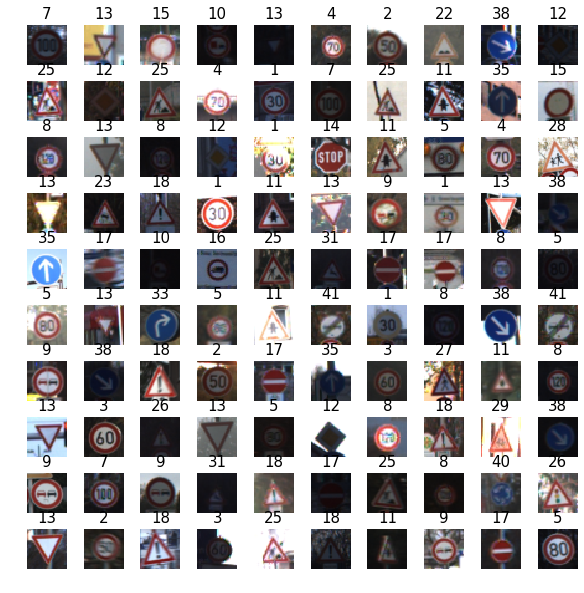

In [5]:
W_grid = 10
L_grid = 10

fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))

axes = axes.ravel()

n_training = len(x_train)


for i in np.arange(0 , W_grid * L_grid):
    
    index = np.random.randint(0,n_training)
    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [6]:
from sklearn.utils import shuffle
x_train,y_train = shuffle(x_train,y_train)

In [7]:
x_train_grey = np.sum(x_train/3,axis=3,keepdims=True)

In [8]:
x_train_grey_norm = (x_train_grey - 128)/128

In [9]:
x_valid,y_valid = shuffle(x_valid,y_valid)
x_valid_grey = np.sum(x_valid/3,axis=3,keepdims=True)
x_valid_grey_norm = (x_valid_grey - 128)/128

In [10]:
x_test,y_test = shuffle(x_test,y_test)
x_test_grey = np.sum(x_test/3,axis=3,keepdims=True)
x_test_grey_norm = (x_test_grey - 128)/128

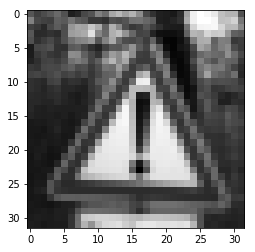

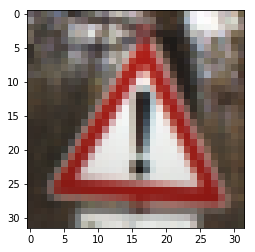

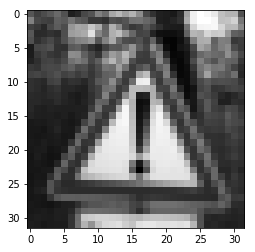

In [11]:
i = random.randint(1,len(x_train_grey))
plt.imshow(x_train_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey_norm[i].squeeze(),cmap='gray')

In [12]:
from tensorflow.keras import datasets,layers,models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation = 'relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)    

In [13]:
CNN.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
history = CNN.fit(x_train_grey_norm,
                  y_train,
                  batch_size=500,
                  epochs=50,
                  verbose=1,
                  validation_data = (x_valid_grey_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 21s 593us/sample - loss: 3.1752 - acc: 0.1743 - val_loss: 2.7384 - val_acc: 0.3034
Epoch 2/50
34799/34799 [==============================] - 19s 549us/sample - loss: 1.8237 - acc: 0.4927 - val_loss: 1.4881 - val_acc: 0.5943
Epoch 3/50
34799/34799 [==============================] - 20s 569us/sample - loss: 1.0746 - acc: 0.6857 - val_loss: 0.9906 - val_acc: 0.7240
Epoch 4/50
34799/34799 [==============================] - 20s 566us/sample - loss: 0.7604 - acc: 0.7787 - val_loss: 0.7863 - val_acc: 0.7841
Epoch 5/50
34799/34799 [==============================] - 20s 580us/sample - loss: 0.6149 - acc: 0.8244 - val_loss: 0.6503 - val_acc: 0.8156
Epoch 6/50
34799/34799 [==============================] - 19s 549us/sample - loss: 0.5243 - acc: 0.8522 - val_loss: 0.6126 - val_acc: 0.8315
Epoch 7/50
34799/34799 [==============================] - 20s 568us/sample - loss: 0.4535 - acc: 0.8727 -

In [15]:
score = CNN.evaluate(x_test_grey_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 175us/sample - loss: 0.6054 - acc: 0.9025
Test Accuracy: 0.9024544954299927


In [16]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

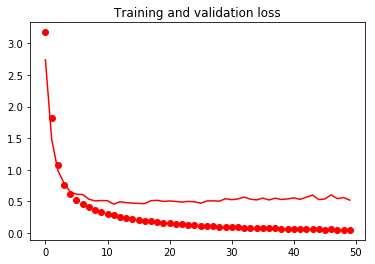

In [17]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation loss')

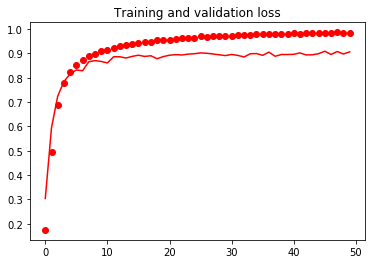

In [18]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation Accuracy')
plt.title('Training and validation loss')

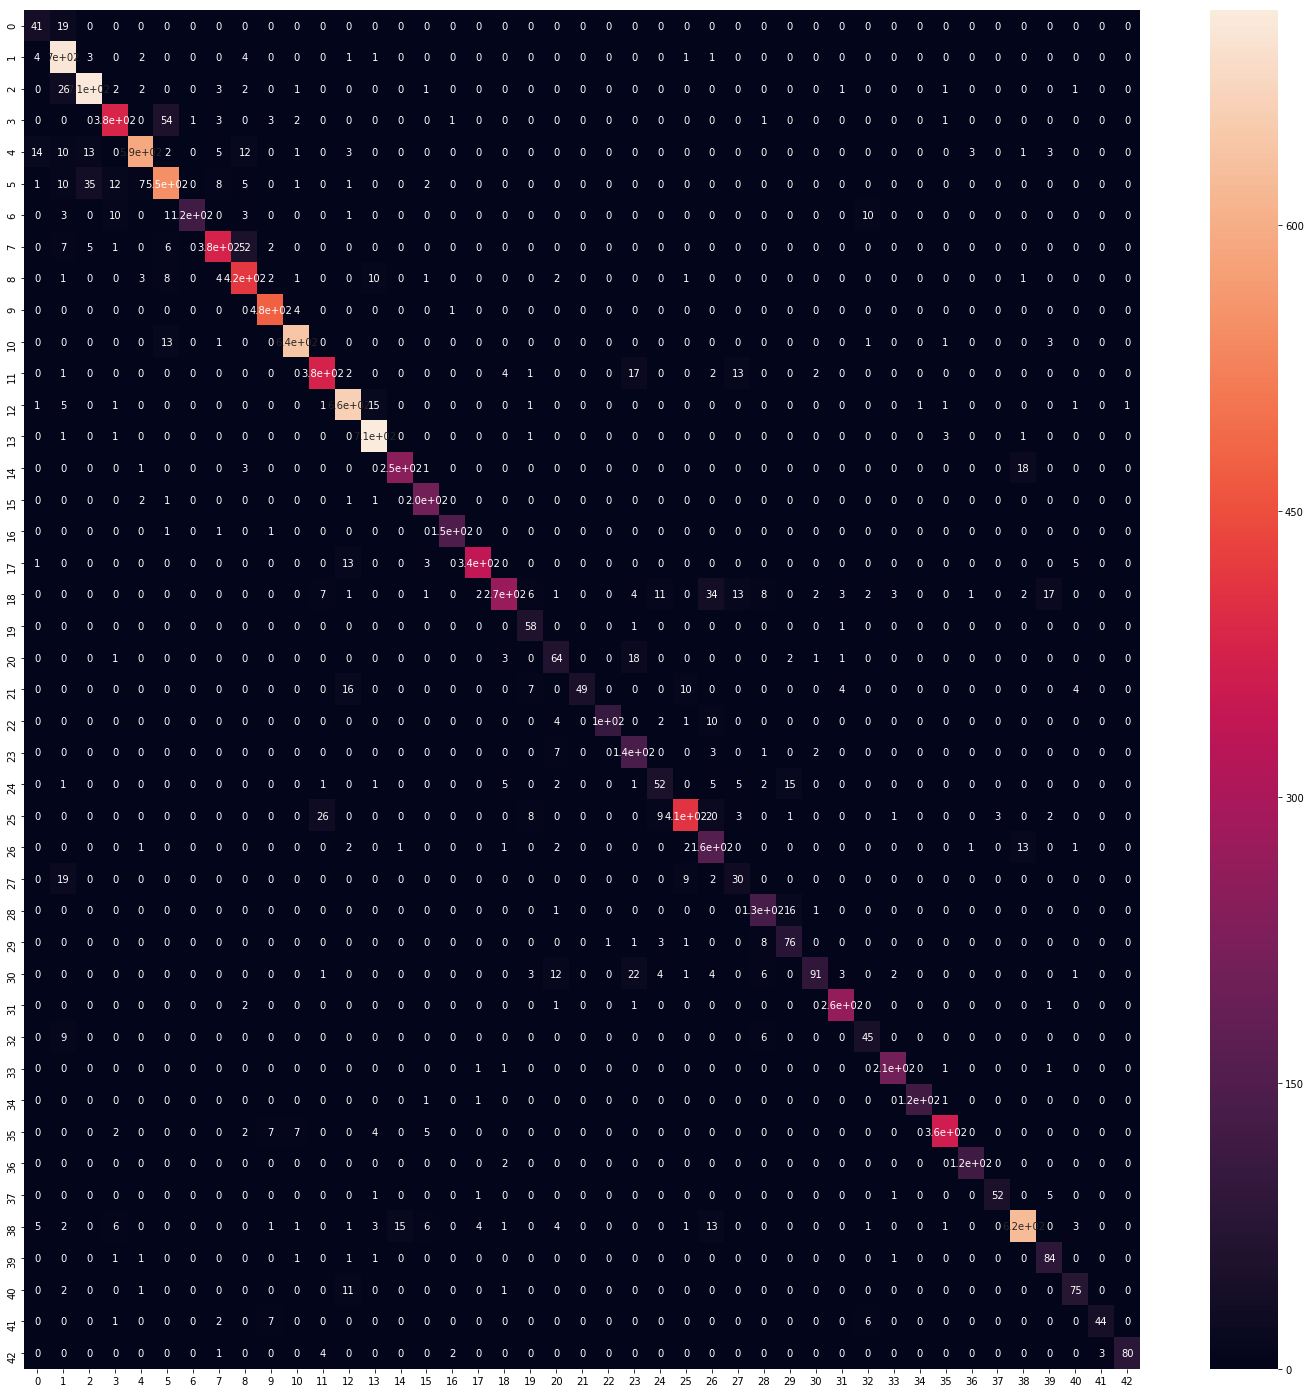

In [19]:
predicted_classes = CNN.predict_classes(x_test_grey_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm,annot=True)

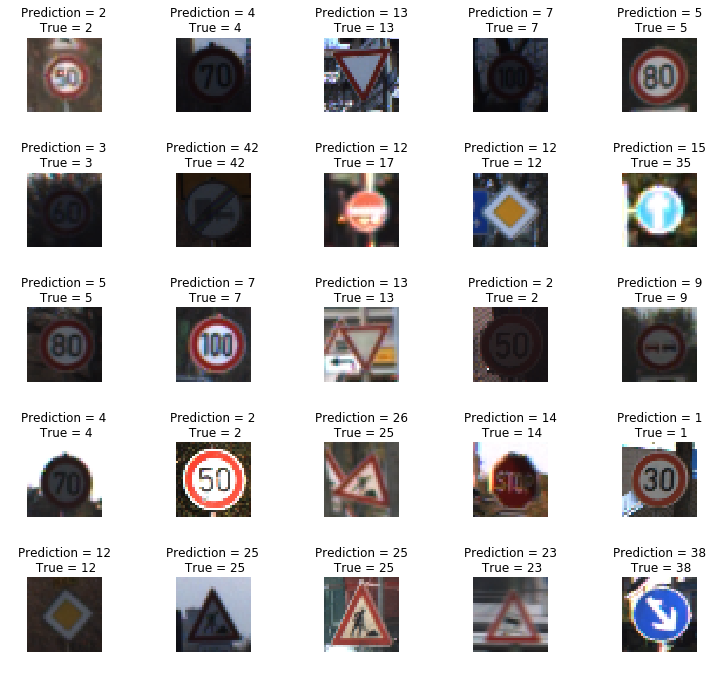

In [20]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)